<a href="https://colab.research.google.com/github/keng-dechathon/ml-art-classifier/blob/main/ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os.path import join
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import tensorflow



In [ ]:
training_dataset_path = "/content/drive/MyDrive/ML/archive/dataset/dataset_updated/training_set"
test_dataset_path = "/content/drive/MyDrive/ML/archive/dataset/dataset_updated/validation_set"

categories = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
n_categories = len(categories)
category_embeddings = {
    'drawings': 0,
    'engraving': 1,
    'iconography': 2,
    'painting': 3,
    'sculpture': 4
}

width = 128 
height = 128 
n_channels = 3

In [ ]:
training_data = []
for cat in categories:
    files = os.listdir(os.path.join(training_dataset_path, cat))
    for file in files:
        training_data += [(os.path.join(cat, file), cat)]

test_data = []
for cat in categories:
    files = os.listdir(os.path.join(test_dataset_path, cat))
    for file in files:
        test_data += [(os.path.join(cat, file), cat)]

In [ ]:
def load_dataset(tuples_list, dataset_path):
    indexes = np.arange(len(tuples_list))
    np.random.shuffle(indexes)   
    X = []
    y = []
    n_samples = len(indexes)
    cpt = 0

    for i in range(n_samples):
        t = tuples_list[indexes[i]]
        try:
            img = cv2.imread(join(dataset_path, t[0]))   
            if img is not None:        
              img = cv2.resize(img,(width,height))           
              X += [img]
              y_tmp = [0 for _ in range(n_categories)]
              y_tmp[category_embeddings[t[1]]] = 1
              y += [y_tmp]
        except OSError:
            pass        
        cpt += 1
         
        if cpt % 1000 == 0:
            print("Processed {} images".format(cpt))
                   
    X = np.array(X)
    y = np.array(y)
    
    return X, y

X_train, y_train = load_dataset(training_data, training_dataset_path)
X_val, y_val = load_dataset(test_data, test_dataset_path)

Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True)

train_datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=5, input_shape=(width, height, n_channels), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(48, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_categories, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 48)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 48)        0         
                                                                 
 flatten_1 (Flatten)         (None, 43200)            

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
training_result = model.fit_generator(generator=train_generator,
                                      validation_data=(X_val, y_val),
                                      epochs=50,
                                      verbose=1,
                                      steps_per_epoch=len(X_train) / 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
120/120 [==============================] - 220s 2s/step - loss: 37.2237 - accuracy: 0.4739 - val_loss: 1.1041 - val_accuracy: 0.5958
Epoch 2/50
120/120 [==============================] - 212s 2s/step - loss: 1.0992 - accuracy: 0.5967 - val_loss: 0.9748 - val_accuracy: 0.6425
Epoch 3/50
120/120 [==============================] - 217s 2s/step - loss: 0.9941 - accuracy: 0.6396 - val_loss: 0.8834 - val_accuracy: 0.6799
Epoch 4/50
120/120 [==============================] - 214s 2s/step - loss: 0.8966 - accuracy: 0.6794 - val_loss: 0.8092 - val_accuracy: 0.7290
Epoch 5/50
120/120 [==============================] - 214s 2s/step - loss: 0.8676 - accuracy: 0.6879 - val_loss: 0.8372 - val_accuracy: 0.7033
Epoch 6/50
120/120 [==============================] - 214s 2s/step - loss: 0.8309 - accuracy: 0.7009 - val_loss: 0.7963 - val_accuracy: 0.7161
Epoch 7/50
120/120 [==============================] - 214s 2s/step - loss: 0.8077 - accuracy: 0.7122 - val_loss: 0.7995 - val_accuracy: 0.707

In [ ]:
model.save("/content/drive/MyDrive/ML/model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/model/assets


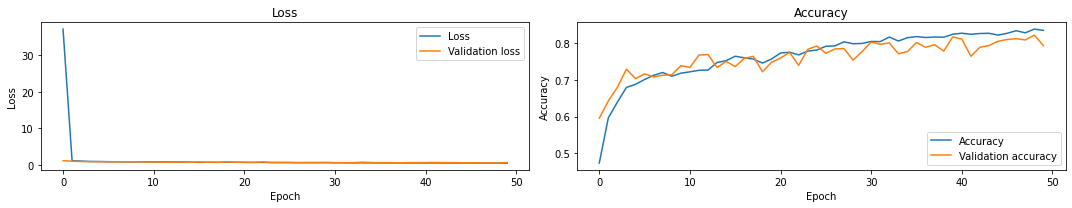

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

#Loss
axes[0].plot(training_result.history['loss'], label="Loss")
axes[0].plot(training_result.history['val_loss'], label="Validation loss")
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Accuracy
axes[1].plot(training_result.history['accuracy'], label="Accuracy")
axes[1].plot(training_result.history['val_accuracy'], label="Validation accuracy")
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

X_test = []
y_test = []
for t in test_data:
    try:
        img = cv2.imread(os.path.join(test_dataset_path, t[0]))
        if img is not None:
          img = cv2.resize(img,(width,height))
          X_test += [img]
          y_test += [category_embeddings[t[1]]]
    except OSError:
        pass

X_test = np.array(X_test)
y_test = np.array(y_test)

pred = model.predict(X_test, verbose=1)

y_pred = np.argmax(pred, axis=1)
print(classification_report(y_test, y_pred))

27/27 [==============================] - 6s 212ms/step
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       122
           1       0.61      0.73      0.66        84
           2       0.83      0.97      0.89       231
           3       0.99      0.79      0.88       228
           4       0.80      0.82      0.81       191

    accuracy                           0.79       856
   macro avg       0.75      0.76      0.75       856
weighted avg       0.80      0.79      0.79       856

